In [110]:
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')
############################################
import numpy as np
from matplotlib import pyplot
from scipy.integrate import solve_ivp

# dummy model

i choose fun and random numbers just to see SOMETHING

In [111]:
r_dummy = 1.4 # growth rate: 40%
K_dummy = 1000 # carrying capacity: 1000 fishies
l_dummy = 0.2 # loss rate: 20%

In [112]:
def L_func_dummy(t,P): # loss function: proportional to the current population, increases linearly over time
    return l_dummy*(t-2000)*P
    # this loss function just assumes loss doesn't happen until the year 2000, and then increases linearly over time
        # i expect over hunting to just kill all the fish here
    # oh yeah t is in terms of years

In [113]:
def P_prime_dummy(t,P): # the model (thumbs up emoji)
    return r_dummy*P*(1-P/K_dummy)-L_func_dummy(t,P)
    # this model is just a logistic growth minus the loss function

In [114]:
P0_dummy = [200] # start with 200 fishies

t_start_dummy = 2000 # start in the year 2000
t_stop_dummy = 2020 # end in the year 2020
t_interval_dummy = np.linspace(t_start_dummy,t_stop_dummy,100)

Text(0.5, 1.0, 'they straight up killed the fish bruh 😭')

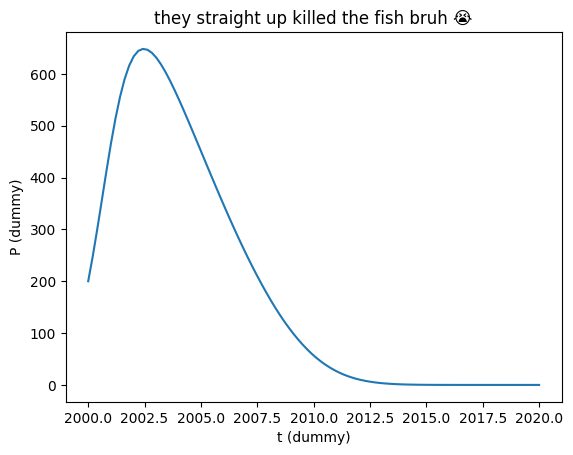

In [115]:
solution = solve_ivp(P_prime_dummy, [t_start_dummy, t_stop_dummy], P0_dummy, t_eval=t_interval_dummy)
pyplot.plot(solution.t, solution.y[0])
pyplot.xlabel("t (dummy)")
pyplot.ylabel("P (dummy)")
pyplot.title("they straight up killed the fish bruh 😭")

# The Actual Model

things to keep in mind:
- growth rate will change over the years
- need to figure out a carrying capacity (which could also change, although i assume not by much)
- loss rate will also change (maybe make a constant natural death rate and THEN consider fishing?)
- these fish have infinite food (or is this considered in carrying capacity? it may be)